In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import random

sys.path.append('NBAStatScraper/database/databasePrep/')
sys.path.append('NBAStatScraper/')
import teams
import prep_games as prep

In [18]:
tor_df = prep.prep_season_results('TOR', '2019')
tor_df['Tm'] = pd.to_numeric(tor_df['Tm'])
tor_df['Opp'] = pd.to_numeric(tor_df['Opp'])
gsw_df = prep.prep_season_results('GSW', '2019')
gsw_df['Tm'] = pd.to_numeric(gsw_df['Tm'])
gsw_df['Opp'] = pd.to_numeric(gsw_df['Opp'])

#For playoffs
# tor_df = prep.prep_playoff_results('TOR', '2019')
# tor_df['Tm'] = pd.to_numeric(tor_df['Tm'])
# tor_df['Opp'] = pd.to_numeric(tor_df['Opp'])
# gsw_df = prep.prep_playoff_results('GSW', '2019')
# gsw_df['Tm'] = pd.to_numeric(gsw_df['Tm'])
# gsw_df['Opp'] = pd.to_numeric(gsw_df['Opp'])

(86.0, 149.0, 0.0, 25.0)

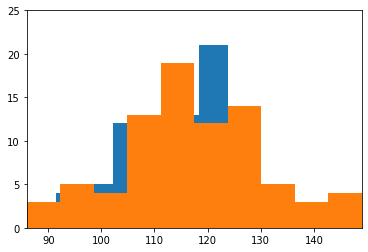

In [19]:
plt.hist(tor_df.Tm, histtype='stepfilled')
plt.hist(gsw_df.Tm, histtype='stepfilled')
plt.axis([min([min(tor_df.Tm), min(gsw_df.Tm)]), max([max(tor_df.Tm), max(gsw_df.Tm)]), 0, 25])

(83.0, 140.0, 0.0, 25.0)

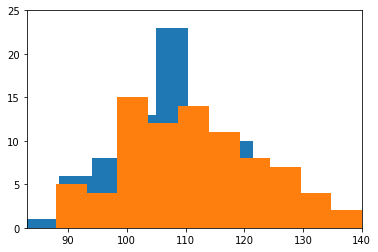

In [20]:
plt.hist(tor_df.Opp, histtype='stepfilled')
plt.hist(gsw_df.Opp, histtype='stepfilled')
plt.axis([min([min(tor_df.Opp), min(gsw_df.Opp)]), max([max(tor_df.Opp), max(gsw_df.Opp)]), 0, 25])

In [21]:
# Get means and standard deviations of points
tor_tm_mean  = tor_df.Tm.mean()
tor_tm_std   = tor_df.Tm.std()
tor_opp_mean = tor_df.Opp.mean()
tor_opp_std  = tor_df.Opp.std()

gsw_tm_mean  = gsw_df.Tm.mean()
gsw_tm_std   = gsw_df.Tm.std()
gsw_opp_mean = gsw_df.Opp.mean()
gsw_opp_std  = gsw_df.Opp.std()

In [22]:
def simulate_single_game():
    tor_score = (random.gauss(tor_tm_mean,tor_tm_std)+random.gauss(gsw_opp_mean,gsw_opp_std))/2
    gsw_score = (random.gauss(gsw_tm_mean,gsw_tm_std)+random.gauss(tor_opp_mean,tor_opp_std))/2
    if tor_score > gsw_score:
        return 'tor'
    return 'gsw'

In [23]:
def simulate_multiple_games(num):
    tor = 0
    gsw = 0
    for i in range(num):
        winner = simulate_single_game()
        if winner == 'tor':
            tor += 1
        else:
            gsw += 1
    return [tor, gsw]

In [24]:
num_games_to_simulate = 1000
results = simulate_multiple_games(num_games_to_simulate)
print("Number of games run: {}".format(num_games_to_simulate))
print("Toronto won {} games. ({}%)".format(results[0], (results[0]/num_games_to_simulate*100)))
print("Golden State won {} games. ({}%)".format(results[1], (results[1]/num_games_to_simulate*100)))

Number of games run: 1000
Toronto won 505 games. (50.5%)
Golden State won 495 games. (49.5%)


In [25]:
def simulate_series(num_series):
    tor = 0
    gsw = 0
    for i in range(num_series):
        tor_s = 0
        gsw_s = 0
        while gsw_s < 4 and tor_s < 4:
            winner = simulate_single_game()
            if winner == 'tor':
                tor_s += 1
            else:
                gsw_s += 1
            if tor_s == 4:
                tor += 1
            elif gsw_s == 4:
                gsw += 1
    return [tor, gsw]

In [27]:
num_series_to_simulate = 100000
results = simulate_series(num_series_to_simulate)
print("Number of series run: {}".format(num_series_to_simulate))
print("Toronto won {} series. ({}%)".format(results[0], (results[0]/num_series_to_simulate*100)))
print("Golden State won {} series. ({}%)".format(results[1], (results[1]/num_series_to_simulate*100)))

Number of series run: 100000
Toronto won 48756 series. (48.756%)
Golden State won 51244 series. (51.244%)


In [31]:
df = teams.get_team_stats('TOR', '2019', 'game')

In [68]:
df = df.sort_values(by=['MP'], ascending=False)
df = df[df['Rk'] < 11]
df = df[['Rk', 'Player', 'MP', 'TRB', 'AST', 'PTS']]
df['PPM'] = df['PTS'] / df['MP']
df['MPRatio'] = df['MP'] / 48.0
sRatio = df['MPRatio'].sum()
df['MPRatioAdj'] = df['MPRatio'] - ((sRatio - 5) / 10.0)
df['eMP'] = df['MPRatioAdj'] * 48.0
df['ePPG'] = df['PPM'] * df['eMP']
df['eRB'] = (df['TRB'] / df['MP']) * df['eMP']
df['eAST'] = (df['AST'] / df['MP']) * df['eMP']

league_ppg = teams.get_league_avg_ppg('2019')

In [69]:
df

,Rk,Player,MP,TRB,AST,PTS,PPM,MPRatio,MPRatioAdj,eMP,ePPG,eRB,eAST
0,1,Kawhi Leonard,34.0,7.3,3.3,26.6,0.782353,0.708333,0.656250,31.5,24.644118,6.763235,3.057353
1,2,Kyle Lowry,34.0,4.8,8.7,14.2,0.417647,0.708333,0.656250,31.5,13.155882,4.447059,8.060294
2,3,Pascal Siakam,31.9,6.9,3.1,16.9,0.529781,0.664583,0.612500,29.4,15.575549,6.359248,2.857053
3,4,Danny Green,27.7,4.0,1.6,10.3,0.371841,0.577083,0.525000,25.2,9.370397,3.638989,1.455596
4,5,Fred VanVleet,27.5,2.6,4.8,11.0,0.400000,0.572917,0.520833,25.0,10.000000,2.363636,4.363636
5,6,Serge Ibaka,27.2,8.1,1.3,15.0,0.551471,0.566667,0.514583,24.7,13.621324,7.355515,1.180515
6,7,Marc Gasol,24.9,6.6,3.9,9.1,0.365462,0.518750,0.466667,22.4,8.186345,5.937349,3.508434
7,8,OG Anunoby,20.2,2.9,0.7,7.0,0.346535,0.420833,0.368750,17.7,6.133663,2.541089,0.613366
8,9,Jeremy Lin,18.8,2.6,2.2,7.0,0.372340,0.391667,0.339583,16.3,6.069149,2.254255,1.907447
9,10,Jonas Valančiūnas,18.8,7.2,1.0,12.8,0.680851,0.391667,0.339583,16.3,11.097872,6.242553,0.867021


In [63]:
df['eMP'].sum()

240.00000000000006

In [81]:
from scipy.stats import invgauss

# rv = invgauss(tor_tm_mean)
# print(invgauss.pdf(random.random(), tor_tm_mean))
tor_tm_mean

114.4390243902439